# Breast Cancer Analysis

## Breast Cancer

**Breast cancer** is a cancer that develops in breast cells. Typically, the cancer forms in either the lobules or the ducts of the breast. Lobules are the glands that produce milk, and ducts are the pathways that bring the milk from the glands to the nipple.


Cancer can also occur in the fatty tissue or the fibrous connective tissue within the breast. Signs of breast cancer may include a lump in the breast, a change in breast shape, dimpling of the skin, fluid coming from the nipple, a newly-inverted nipple, or a red or scaly patch of skin.


The risk factors for developing breast cancer include obesity, a lack of physical exercise, alcoholism, hormone replacement therapy during menopause, ionizing radiation, an early age at first menstruation, having childern late in life or not at all, having prior history of breast cancer, and a family history of breast cancer. The exact cause of breast cancer remains unclear, but some risk factors make it more likely. And it is possible to prevent some of these risk factors.


**Symptoms:**
Breast cancer most commonly presents as a lump that feels different from the rest of the breast tissue. More than 80% of cases are discovered when a person detects such a lump with the fingertips. The earliest breast cancers, however are detected by a mammogram.


**Types:**
There are several types of breast cancer, and they are broken into two main categories which are:

 1. Invasive
 2. Non-Invasive
 
While invasive cancer has spread from the breast ducts or glands to other parts of the breast, noninvasive cancer has not spread from the original tissue.


**It’s important to understand that most breast lumps are benign and not cancer (malignant). Non-cancer breast tumors are abnormal growths, but they do not spread outside of the breast. They are not life threatening, but some types of benign breast lumps can increase a woman's risk of getting breast cancer.**

## Objective

This analysis aims to observe which features are most helpful in predicting malignant or benign cancer. The goal is to classify whether the breast cancer is benign or malignant.

## Import Libraries & Loading Data

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction import DictVectorizer

In [2]:
data = pd.read_csv("data.csv")

## Looking at Data (EDA)

In [3]:
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset has 569 rows and 33 columns.


Describing the dataset by numerical variable's summaries.

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Variable names "Unnames: 32" seems like odd.
<br>
Let's see top 5 rows of dataset:

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Let's check for any missing values in the dataset.

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

So we remove the column "Unnamed: 32"

In [7]:
data = data.drop("Unnamed: 32", axis = 1)

In [8]:
print(f"Now, the dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

Now, the dataset has 569 rows and 32 columns.


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Getting value counts (target distribution) for two categories of Diagnosis:

In [10]:
n_Benign, n_Malignant = data["diagnosis"].value_counts()

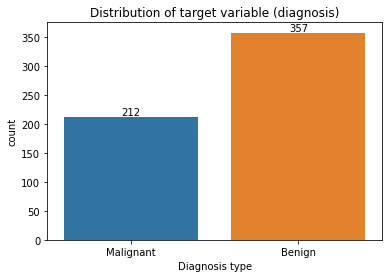

In [11]:
ax = sns.countplot(x = "diagnosis", data = data)
    
ax.bar_label(ax.containers[0], label_type='edge')

plt.xlabel("Diagnosis type")
plt.xticks([0,1],["Malignant", "Benign"])
plt.title("Distribution of target variable (diagnosis)")
plt.show()

In [12]:
print("Number of Benign: {}".format(n_Benign))
print("Number of Malignant: {}".format(n_Malignant))

Number of Benign: 357
Number of Malignant: 212


Let's look at the joint and marginal distribution of each variable's mean:

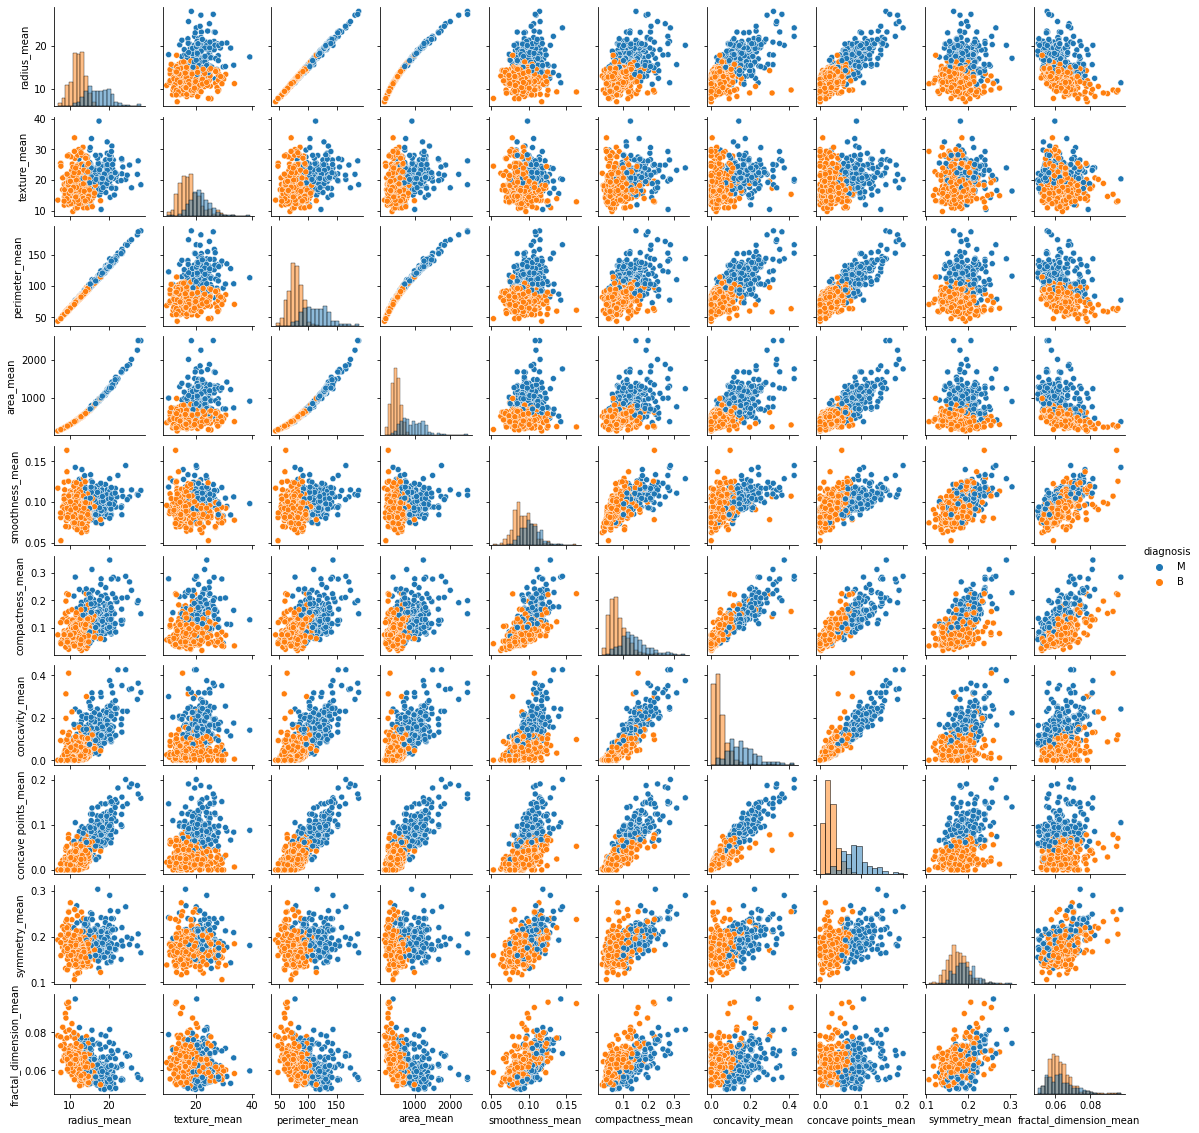

In [13]:
sns.pairplot(data.iloc[:,1:12],hue='diagnosis', diag_kind='hist',height=1.6)

From above figures, there is somewhat distinction between values of variables and type of diagnosis. And malignant cases are usually on higher values of variables.

Let's look at the boxpolot of first 10 variables (mean of measurements):

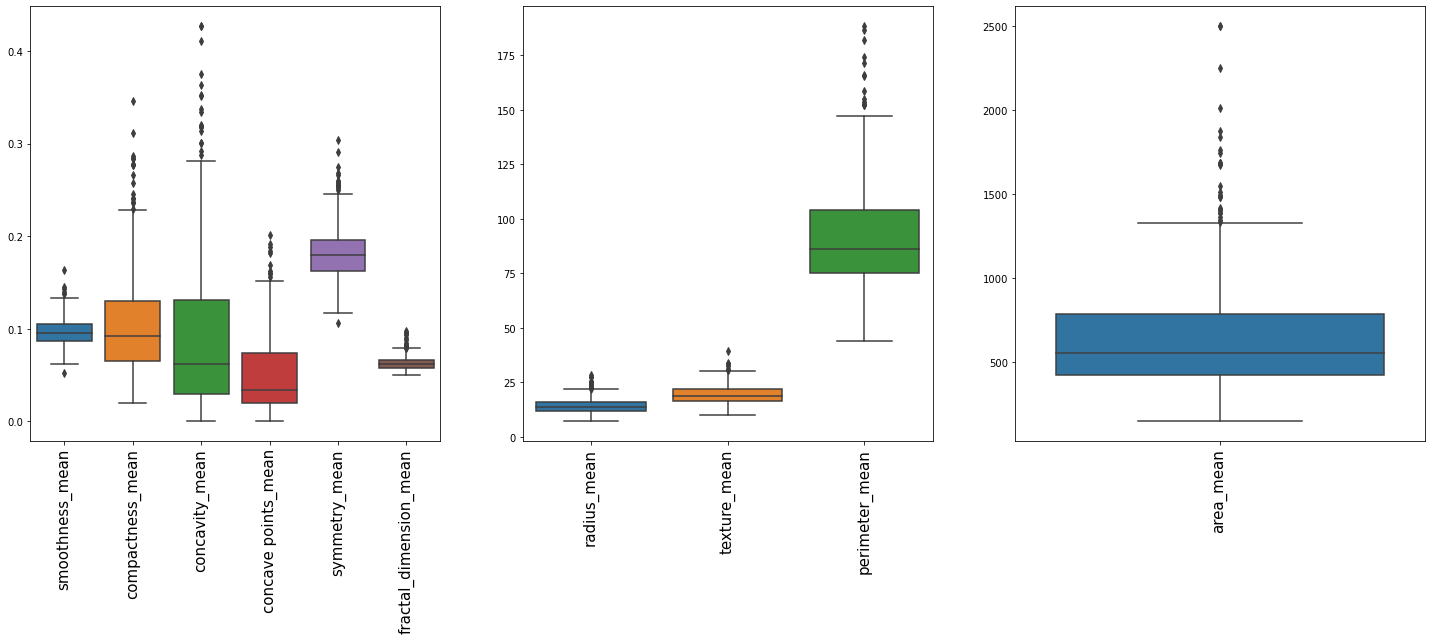

In [14]:
plt.figure(figsize=(25,8))

plt.subplot(1,3,1)
sns.boxplot(data = data.iloc[:,6:12])
plt.xticks(rotation=90, size = 15)

plt.subplot(1,3,2)
sns.boxplot(data = data.iloc[:,2:5])
plt.xticks(rotation=90, size = 15)

plt.subplot(1,3,3)
sns.boxplot(data = data.iloc[:,5:6])
plt.xticks(rotation=90, size = 15)

plt.show()


We will see the correlation between each variables:

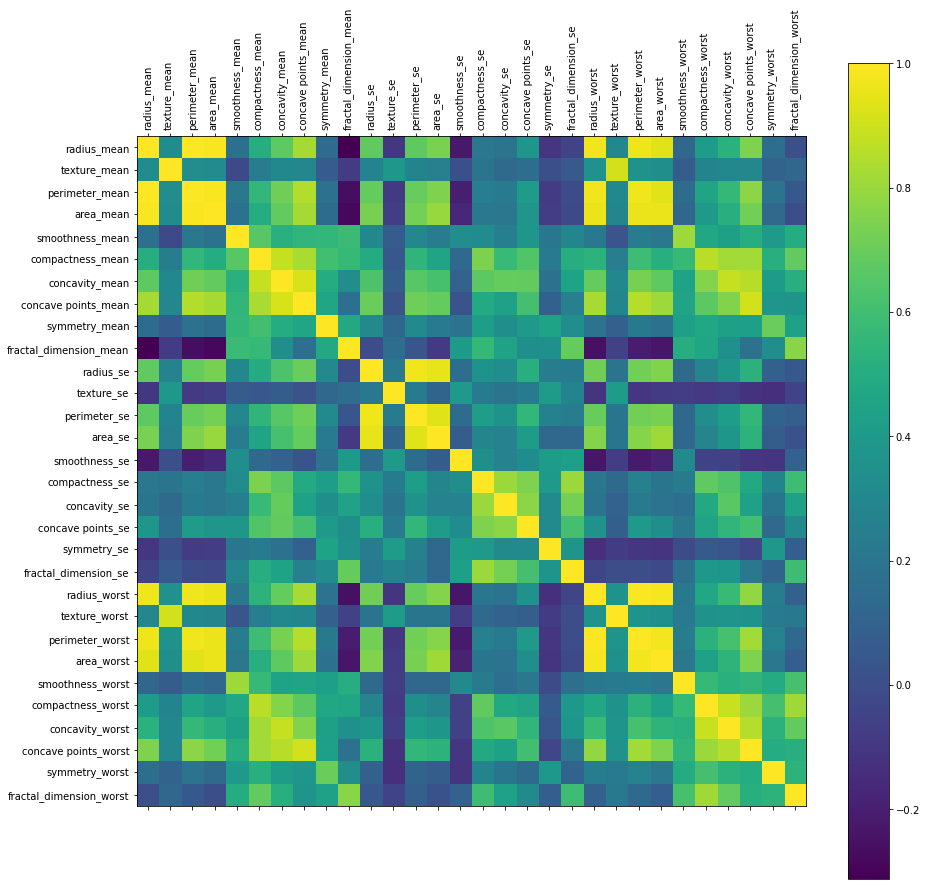

In [15]:
corr = data.iloc[:,1:].corr()

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr)
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Much of the variables don't have strong positivie correlation. There are some weak negative correlation like radius and fractal dimension etc. And some strong correlation between obvious varialbles like area and radius, radius and perimeter etc.

## Feature Engineering

### Splitting Features from Target

In [168]:
X = data.iloc[:,2:].values
y = data.iloc[:,1].values

### Train-Test Split and Scaling

In [170]:
# Encoding y to 0 and 1
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [172]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


# Since there were some outliers in data, we use robust scaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

Creating function for grid search cross validation:

In [19]:
def modelsearch(classifier, parameters, scoring, X_train, y_train):
    
    model = GridSearchCV(estimator=classifier,
                   param_grid=parameters,
                   scoring= scoring,
                   cv=10,
                   verbose=1,
                   n_jobs=-1)
    
    model.fit(X_train, y_train)
    cv_results = model.cv_results_
    best_parameters = model.best_params_
    best_result = model.best_score_
    print('The best parameters for classifier is', best_parameters)
    print('The best training score is %.3f:'% best_result)
    
    return cv_results, best_parameters, best_result

### Logistic Regression

In [33]:


logistic = LogisticRegression(random_state = 42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'max_iter': [200,300,400,500],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

cv_results, best_param, best_result = modelsearch(classifier = logistic,parameters = param_grid, scoring = "f1",
                                                  X_train = X_train, y_train = y_train)




Fitting 10 folds for each of 140 candidates, totalling 1400 fits
The best parameters for classifier is {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
The best training score is 0.980:


In [34]:
logReg = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            solver = best_param["solver"],
                            max_iter = best_param["max_iter"],
                            random_state=42)
logReg.fit(X_train, y_train)

logReg_pred = logReg.predict(X_test)

print(classification_report(y_test, logReg_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        80
           1       0.83      1.00      0.91        34

    accuracy                           0.94       114
   macro avg       0.91      0.96      0.93       114
weighted avg       0.95      0.94      0.94       114



### kNN

In [41]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

cv_results, best_param, best_result = modelsearch(classifier = knn,parameters = param_grid, scoring = "f1",
                                                  X_train = X_train, y_train = y_train)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
The best parameters for classifier is {'n_neighbors': 3}
The best training score is 0.953:


In [42]:
kNN = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'])

kNN.fit(X_train, y_train)

kNN_pred = kNN.predict(X_test)

print(classification_report(y_test, kNN_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        80
           1       0.91      0.91      0.91        34

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Random Forest

In [24]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [20, 50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

cv_results, best_param, best_result = modelsearch(classifier = rf, parameters = param_grid, scoring = "f1",
                                                  X_train = X_train, y_train = y_train)



Fitting 10 folds for each of 20 candidates, totalling 200 fits
The best parameters for classifier is {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 20}
The best training score is 0.962:


In [25]:
rf_clf = RandomForestClassifier(n_estimators = best_param['n_estimators'],
                                criterion = best_param['criterion'],
                                bootstrap = best_param['bootstrap'],
                                random_state=42)
rf_clf.fit(X_train, y_train)


rf_pred = rf_clf.predict(X_test)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        80
           1       0.89      0.97      0.93        34

    accuracy                           0.96       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Following three models were tested:
 1. Logistic Regression
 2. k-neighbors classification
 3. Random Forest

| values   | Model         | Precision | Recall | f1-score|
|----------|---------------|-----------|--------|---------|
|  0       | Logistic      |   1.0     |  .91   |  .95    |
|  1       | Logistic      |    .83    | 1.0    |  .91    |
|  0       | kNN           |    .96    |  .96   |  .96    |
|  1       | kNN           |    .91    |  .91   |  .91    |
|  0       | Random Forest |    .99    |  .95   |  .97    |
|  1       | Random Forest |    .89    |  .97   |  .93    |


In this breast, cancer dataset, the performance of **Random Forest (f1 = 0.93)**
is better than all other models with f1-score equal to 0.96 compared to other models: logistic (f1 = .91) and kNN (f1 = .91) 


So we use random forest model with best hyperparameters.

## Saving the Model

In [47]:
import pickle

In [113]:
output_file = "randomForestmodel.bin"
output_file

'randomForestmodel.bin'

In [180]:
dv = DictVectorizer()

In [181]:
f_out = open(output_file, "wb")
pickle.dump((dv, scaler,rf_clf), f_out)
f_out.close()

In [182]:
with open(output_file, "wb") as f_out:
    pickle.dump((dv, scaler,rf_clf), f_out)

## Loading the Model

In [183]:
model_file = 'randomForestmodel.bin'

In [184]:
with open(model_file, "rb") as f_in:
    dv,scaler,rf_clf = pickle.load(f_in)

In [185]:
dv, scaler, rf_clf

(DictVectorizer(),
 RobustScaler(),
 RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42))

In [186]:
new_obs = {"radius_mean": 20.29,
 "texture_mean": 14.34,
 "perimeter_mean": 135.1,
 "area_mean": 1297.0,
 "smoothness_mean": 0.1003,
 "compactness_mean": 0.1328,
 "concavity_mean": 0.198,
 "concave points_mean": 0.1043,
 "symmetry_mean": 0.1809,
 "fractal_dimension_mean": 0.05883,
 "radius_se": 0.7572,
 "texture_se": 0.7813,
 "perimeter_se": 5.438,
 "area_se": 94.44,
 "smoothness_se": 0.01149,
 "compactness_se": 0.02461,
 "concavity_se": 0.05688,
 "concave points_se": 0.01885,
 "symmetry_se": 0.01756,
 "fractal_dimension_se": 0.005115,
 "radius_worst": 22.54,
 "texture_worst": 16.67,
 "perimeter_worst": 152.2,
 "area_worst": 1575.0,
 "smoothness_worst": 0.1374,
 "compactness_worst": 0.205,
 "concavity_worst": 0.4,
 "concave points_worst": 0.1625,
 "symmetry_worst": 0.2364,
 "fractal_dimension_worst": 0.07678}


In [187]:
new_obs = dv.fit_transform(new_obs)
X = scaler.transform(new_obs)

In [190]:
pred_prob = rf_clf.predict_proba(X)[0,1]
pred_prob

0.85

In [192]:
pred_prob > 0.5

True

The breast lump is malignant.